<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day085_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense



def build_mlp(input, output=10, units=[256, 128,128]):
    """Code Here
    建立你的神經網路
    """
    model=Sequential()
    for i, n in enumerate(units):
      if i==0:
        model.add(Dense(n, input_shape=input, activation='relu'))
      else:
        model.add(Dense(n, activation='relu'))
    model.add(Dense(output, activation='softmax'))
    return model

In [0]:
"""Code Here
設定超參數
"""
batch_size = 256
epochs = 50

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
es=[25,10,5]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in es:
  earlystop = EarlyStopping(monitor="val_loss", 
                          patience=i, 
                          verbose=1
                          )

  model= build_mlp(input=x_train.shape[1:])
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop] )
  results[i] = {'train-loss': model.history.history["loss"], 'valid-loss': model.history.history["val_loss"], 'train-acc': model.history.history["acc"], 'valid-acc': model.history.history["val_acc"]}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.9199 - acc: 0.3076 - val_loss: 1.7942 - val_acc: 0.3459
Epoch 2/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7063 - acc: 0.3879 - val_loss: 1.6442 - val_acc: 0.4079
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6138 - acc: 0.4252 - val_loss: 1.6069 - val_acc: 0.4268
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5510 - acc: 0.4472 - val_loss: 1.5929 - val_acc: 0.4330
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5162 - acc: 0.4578 - val_loss: 1.5343 - val_acc: 0.4618
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4812 - acc: 0.4727 - val_loss: 1.5342 - val_acc: 0.4549
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4551 - acc: 0.4818 - val_loss: 1.4720 - 

# 25 times patience, no early stopping occured during 50 epochs training
# 10 times patience, early stopping occured at the 35th time training
# 5 times patience, early stopping occured at the 30th time training (reasonable, right, we patience 10, and it occured 5 times later...)

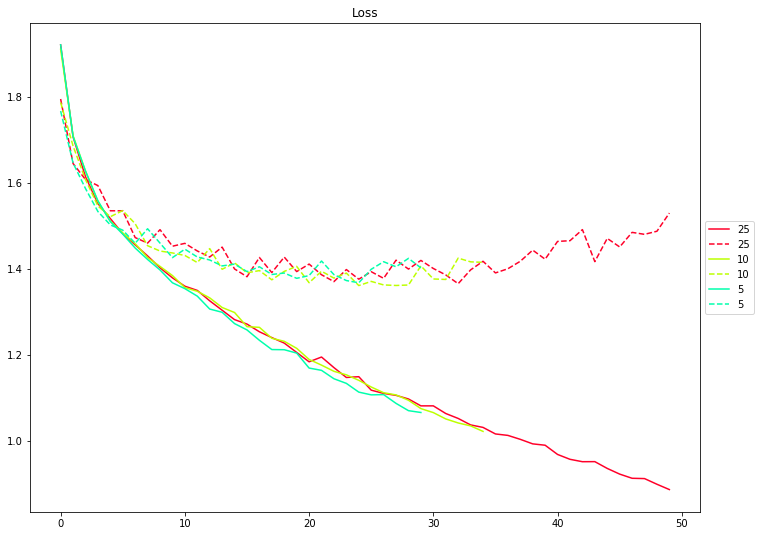

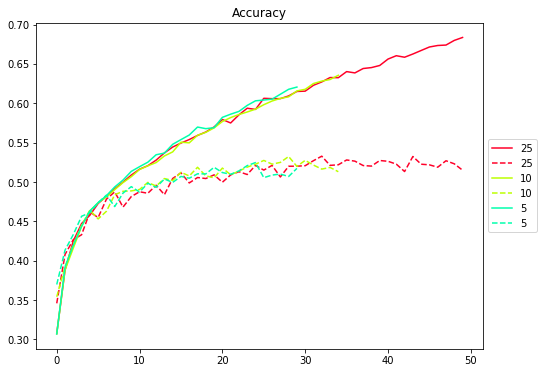

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*5])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i*5])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()